In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from methods import *

In [2]:
init_mpl(150)

# How to run the code
To carry out a simple Stokes flow simulation, defined as

$$-\nabla p + \nabla^2 \mathbf{v} = \mathbf{f}, \text{ on } \Omega $$

$$ \nabla \cdot \mathbf{v} = 0,\quad \text{on } \Omega $$
$$ \mathbf{v}=\mathbf{v}_\partial\quad \text{on } \partial\Omega, $$

using our code one first defines $\Omega$, $J_1$, $J_2$, $\mathbf{v}_0$, and $\mathbf{f}$. The system is then transformed in the following linear system:

$$\begin{bmatrix} A & G \\ D & \end{bmatrix} \begin{bmatrix} \mathbf{v}_h \\ \mathbf{p}_h \end{bmatrix} = \begin{bmatrix} \mathbf{f}_h \\ \mathbf{g}_h \end{bmatrix} $$

using the finite-volume method.

In [3]:
def f(x):
    X = x[0]
    Y = x[1]
    return np.array([1,1])


def v0(x):
    X = x[0]
    Y = x[1]
    return np.array([X**2,-Y**2])
    
J1 = 10
J2 = 10
Omega = np.array([0,1,0,1]) #xmin,xmax,ymin,ymax (only works for rectangular domain)


One can now run the simulation as follows. This returns the discretized mesh, the pressure at each point, the velocity in the $x^1$-direction at eacht point, and the velocity in the $x^2$ direction at each point. One can also choose to visualize the matrices used to numerically solve the equation. Note here that $D \neq G^T$, due to our ordering of points in $\mathbf{v}_h$. The obtained results should not be affected by this. 

/home/toby/Projects/Fluid-codes/2D Stokes flow - finite volume/methods.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coord_mat = np.array(coord_mat)


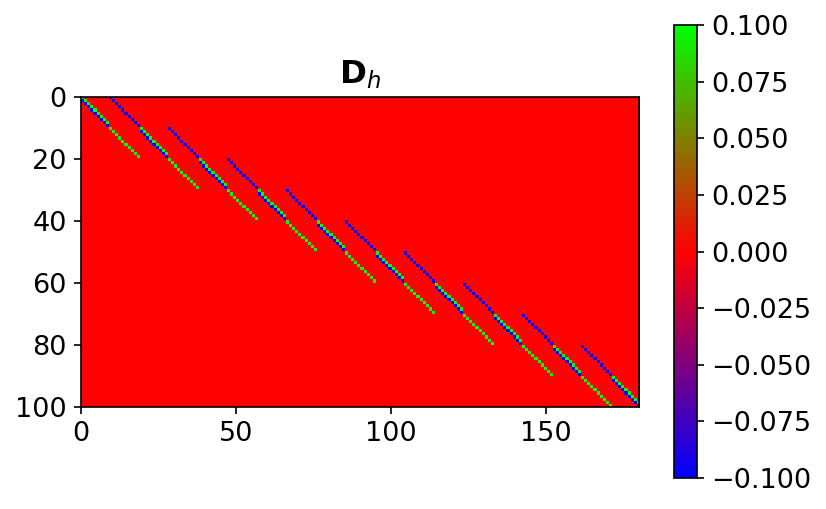

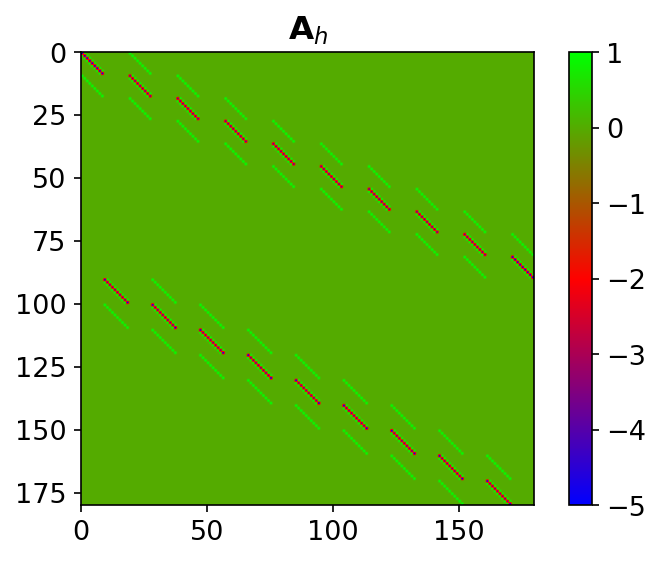

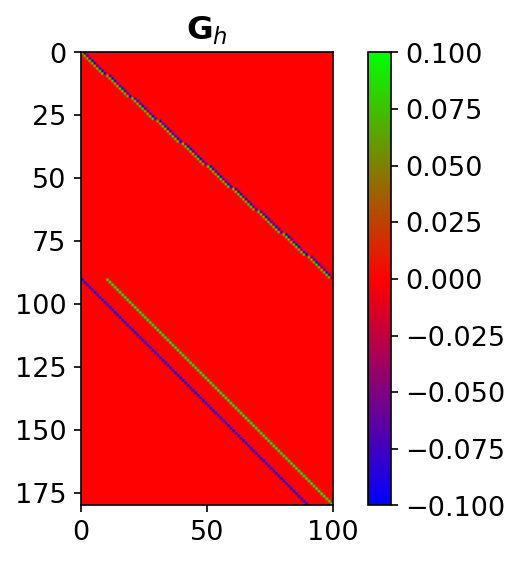

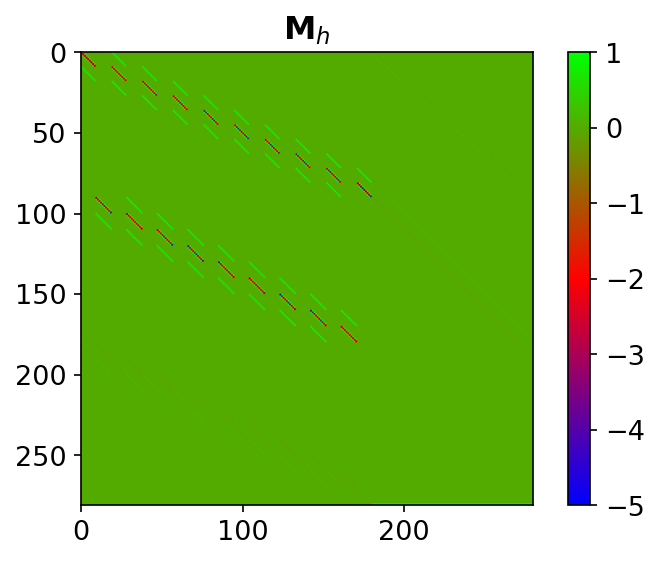

/home/toby/Projects/Fluid-codes/2D Stokes flow - finite volume/methods.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  vel = np.array(cache)


In [4]:
mesh, press,vel_x,vel_y = Stokes_simulation(J1,J2,v0 = v0,f = f,domain = Omega, visualize_matrices = True)


For visualization purposes we gather some information from the mesh.

In [5]:
x_mesh = mesh[:,:,0]
y_mesh = mesh[:,:,1]


x_min = x_mesh.min()
x_max = x_mesh.max()
y_min = y_mesh.min()
y_max = y_mesh.max()
ranges = [x_min,x_max,y_min,y_max]



Visualizing the solution is now quite straightforward. 

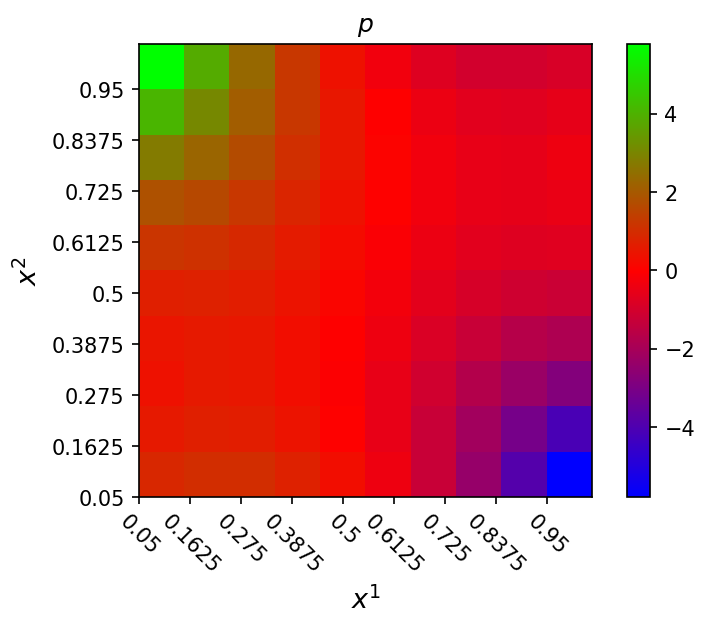

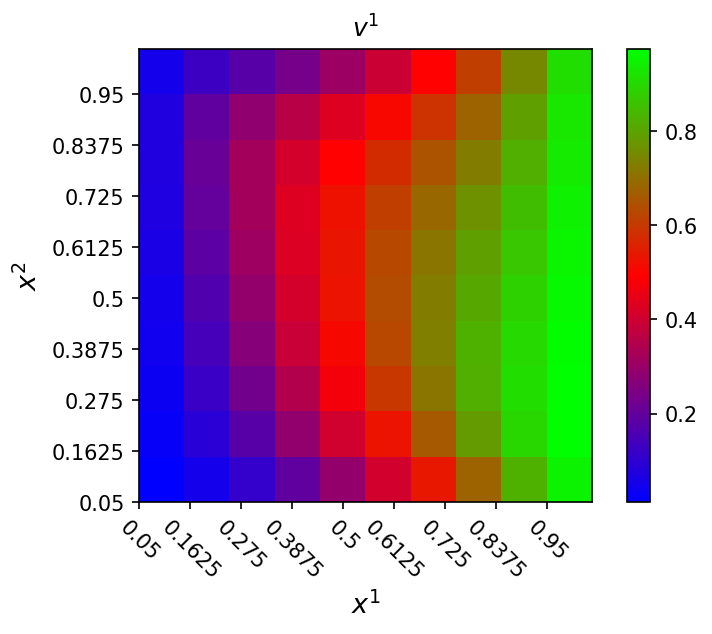

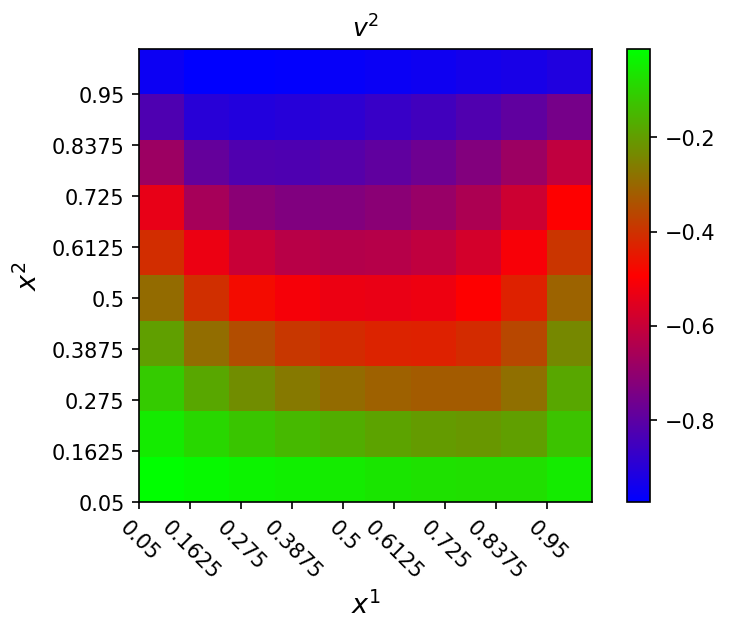

In [6]:
init_mpl(150,mat_settings = True)
#############################
vis_mat(press,plot = False, color = 'brg', ranges = ranges)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$p$')
plt.show()

vis_mat(vel_x,plot = False, color = 'brg', ranges = ranges)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$v^1$')
plt.show()

vis_mat(vel_y,plot = False, color = 'brg', ranges = ranges)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$v^2$')
plt.show()
##############################
init_mpl(150,mat_settings = True)



A nice way to visualize the velocity field is shown here.

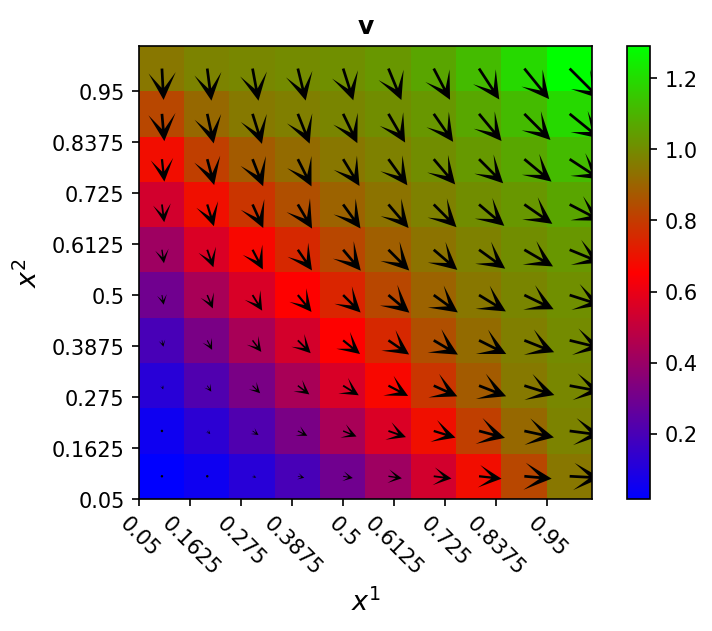

In [7]:
init_mpl(150,mat_settings = True)
#########################
M = np.hypot(vel_x, vel_y)
vis_mat(M,plot = False,color = 'brg',ranges = ranges)



y_normalizer = 2*J2/J1


corr_x = (2-2/J1)/(x_max -x_min)*x_mesh
corr_x = corr_x - np.average(corr_x)
corr_y = (y_normalizer-y_normalizer/J2)/(y_max -y_min)*y_mesh
corr_y = corr_y - np.average(corr_y)



plt.quiver(corr_x,corr_y,vel_x,vel_y,headwidth = 10,headlength = 10)

plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$\mathbf{v}$')

plt.show()
############################33
init_mpl(150,mat_settings = False)

# Grid testing

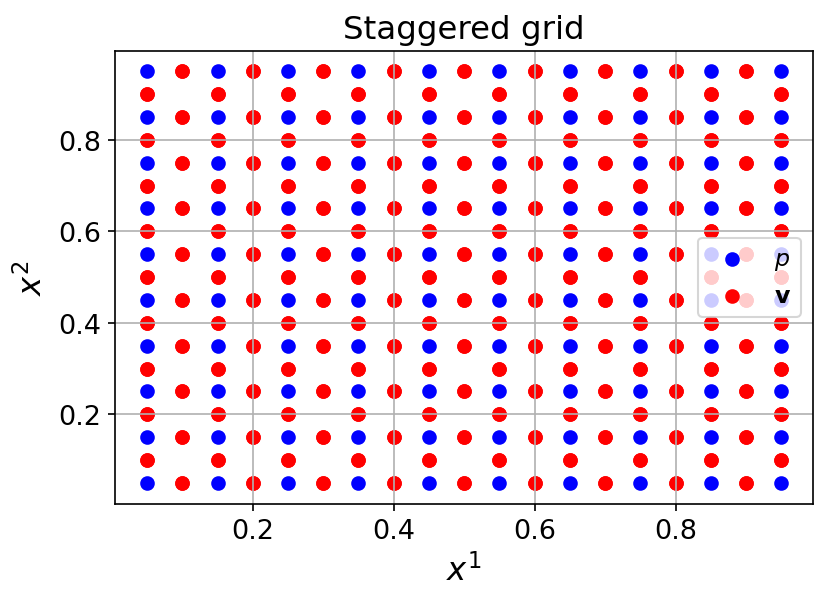

In [8]:
ranges = np.array([0,1,0,1])
J1 =10
J2 = 10
z = create_mesh(ranges,J1,J2)
coord_mat,trans_dict = vel_uniform_mesh(z)

first = True
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        c = z[i,j]
        trans = trans_dict[(i,j)]
        if first:
            plt.scatter(c[0],c[1],c = 'b',label = '$p$')
            ######### trans to coord #####
            for t in trans:
                if not np.isnan(t[0]):
                    converted = coord_mat[t[0]][t[1]]
            ################################
                    if first:
                        plt.scatter(converted[0],converted[1],c = 'r',label = '$\mathbf{v}$')
                        first = False
                    else: 
                        plt.scatter(converted[0],converted[1],c = 'r')
        else:
            plt.scatter(c[0],c[1],c = 'b')
            ######### trans to coord #####
            for t in trans:
                if not np.isnan(t[0]):
                    converted = coord_mat[t[0]][t[1]]
            #################################
                    plt.scatter(converted[0],converted[1],c = 'r')
        

        
plt.legend()
plt.grid(True)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('Staggered grid')
plt.show()


# Stokes cavity flow

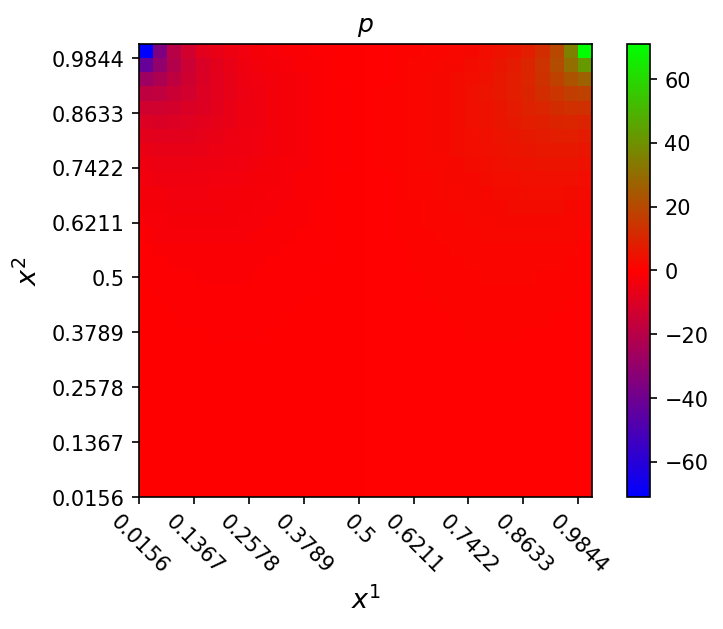

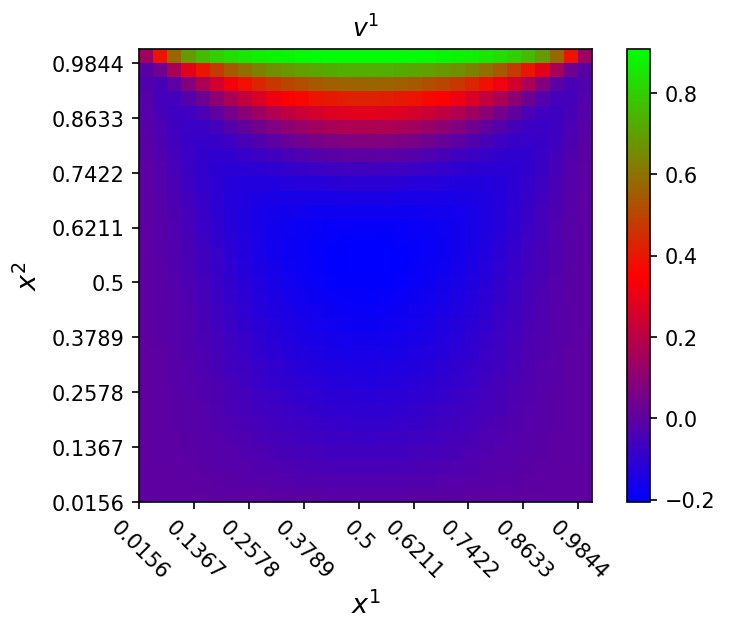

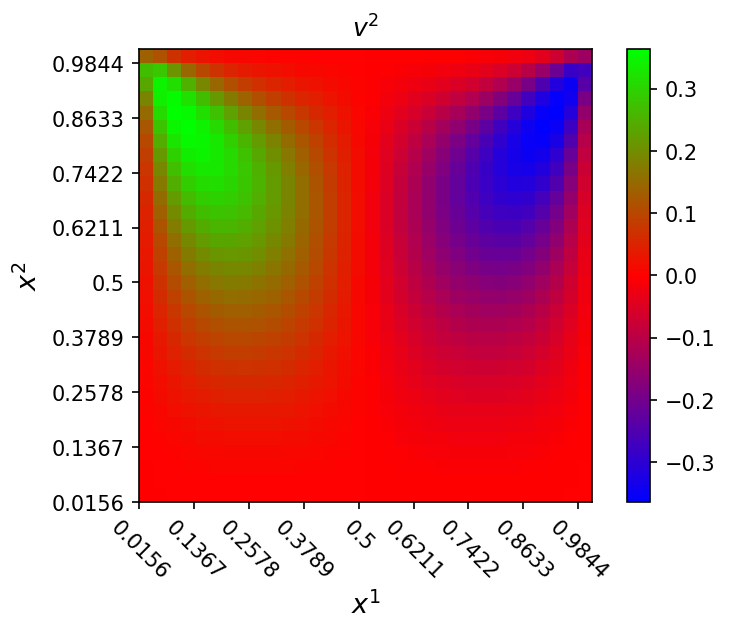

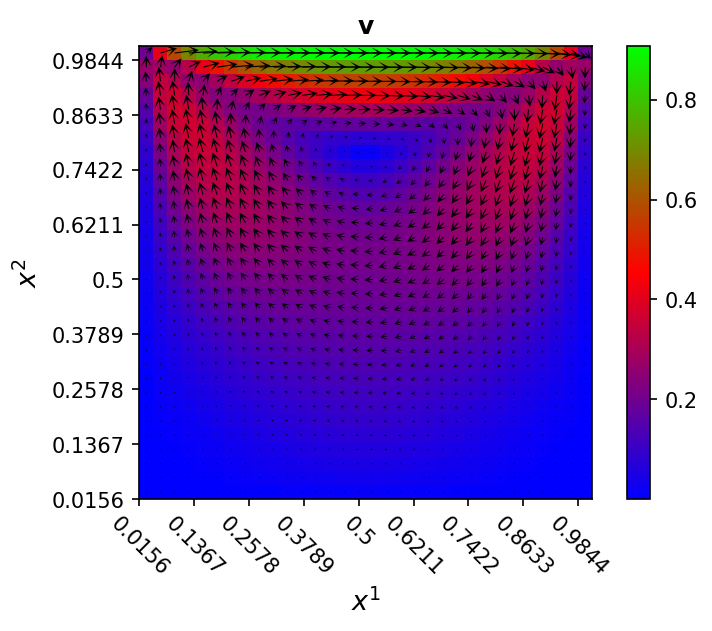

In [9]:
init_mpl(150,mat_settings = True)

def v0_sf(x):
    if np.round(x[1],5) >= 1:
        return np.array([1,0])
    else:
        return np.array([0,0])
    
def f_sf(x):
    return np.array([0,0])
    
J1 = 32
J2 = 32
domain = np.array([0,1,0,1])
mesh, press,vel_x,vel_y = Stokes_simulation(J1,J2,v0 = v0_sf,f = f_sf,domain = domain)
x_mesh = mesh[:,:,0]
y_mesh = mesh[:,:,1]


x_min = x_mesh.min()
x_max = x_mesh.max()
y_min = y_mesh.min()
y_max = y_mesh.max()
ranges = [x_min,x_max,y_min,y_max]

#############################
vis_mat(press,plot = False, color = 'brg', ranges = ranges)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$p$')
plt.show()

vis_mat(vel_x,plot = False, color = 'brg', ranges = ranges)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$v^1$')
plt.show()

vis_mat(vel_y,plot = False, color = 'brg', ranges = ranges)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$v^2$')
plt.show()
##############################


M = np.hypot(vel_x, vel_y)
vis_mat(M,plot = False,color = 'brg',ranges = ranges)


y_normalizer = 2*J2/J1


corr_x = (2-2/J1)/(x_max -x_min)*x_mesh
corr_x = corr_x - np.average(corr_x)
corr_y = (y_normalizer-y_normalizer/J2)/(y_max -y_min)*y_mesh
corr_y = corr_y - np.average(corr_y)


plt.quiver(corr_x,corr_y,vel_x,vel_y,headwidth = 10,headlength = 10)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('$\mathbf{v}$')

plt.show()
init_mpl(150,mat_settings = False)